Website:
https://jesparza17.github.io/Jesparza17/



# Spin to Win? An Analysis of Which Pitchers Were Hurt the Most After MLB's Crackdown on Sticky Stuff
### By: Julian Esparza and Sam Broth

### Background

The two of us are working together on our final tutorial project. We would like to analyze data about baseball, specifically about pitchers, to attempt to conclude which pitchers may have been using illegal “sticky stuff” prior to the crackdown on it by Major League Baseball. Three rules in the [MLB’s very detailed rulebook](https://img.mlbstatic.com/mlb-images/image/upload/mlb/atcjzj9j7wrgvsm8wnjq.pdf "2021 MLB Rulebook") essentially prohibit the application of “foreign substances” directly on the baseball. While these rules have been there for a long time, they were very rarely enforced. One anonymous former pitcher estimated that prior to June 2021, [an overwhelming majority of pitchers in the MLB used some substance(s)](https://www.si.com/mlb/2021/06/04/sticky-stuff-is-the-new-steroids-daily-cover "'This Should Be the Biggest Scandal in Sports'") to help them alter the movement and spin on their pitches. These substances range anywhere from sunscreen to glue. It always seemed that everyone accepted how the MLB and its umpires turned a blind eye to this - that is, until a few months ago. On June 21, 2021, commissioner Rob Manfred and Major League Baseball finally [decided to enforce the rules](https://www.espn.com/mlb/story/_/id/31682815/major-league-baseball-crackdown-sticky-substances-begins-regular-checks-pitchers-monday "Major League Baseball's crackdown on sticky substances begins with regular checks on pitchers Monday") and crackdown on sticky stuff. After all, the league-wide batting average was the [lowest it had been since 1968](https://www.espn.com/mlb/story/_/id/31371552/mlb-hopes-offensive-numbers-perk-historically-rough-april-hitters "MLB hopes offensive numbers perk up after historically rough April for hitters")! 
Using data from multiple sources, we hope to see which pitchers were negatively affected from this change. The dataset we are most excited about working with is from [Baseball Savant](https://baseballsavant.mlb.com/ "Baseball Savant"), a really great website for all things [sabermetrics](https://en.wikipedia.org/wiki/Sabermetrics "Sabermetrics"). There is a plethora of statistics we can use, and we are happy to explore all of them. A few that will really come in handy - average spin and average break by pitch. 



### Questions We Would Like to Answer
* Which pitchers’ average spin rate dropped the most after the enforcement of the rule? 

* Which pitchers’ expected batting average got higher after the change?

* Did some pitchers stop throwing a favorite pitch of theirs because they were better at it before the change?

* *Our main question:* Who was using the sticky stuff?


While we can most likely get most of our answers from the amazing datasets on Baseball Savant, [FanGraphs](https://www.fangraphs.com/ "FanGraphs") may also come in handy with more historical data. 

**It is extremely important to note that due to limitations in the availability of data, we will be looking at the pitchers' changes from 2020 to 2021.**

Fortunately, the enforcement of the rules occurred in the beginning half of the season, so a change in statistics will still be clear.

### Collaboration Plan
Our collaboration plan revolves around our shared GitHub repository, which will be where everything is easily accessible. We meet, mostly on Zoom, as often as required, and perhaps use VSCode if we need to be coding at the same time. We have both found that its LiveShare feature works very well for that.

### Data ETL

#### Extraction

In [1]:
##Importing Necessary Packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 999
%matplotlib inline

The datasets shown below were extracted from [Baseball Savant](https://baseballsavant.mlb.com/ "Baseball Savant"). In this website we are given many datasets which can be filtered based upon several different options in a drop down menu. This menu allows for data to be broken down by a certain statistic across players in the MLB.

## Fastballs

The first table we are reading in contains every pitcher from 2020 who has at least 50 plate appearances (PA) and three metrics relating to their fastballs: how often they throw it, their average speed, and their average spin rate. From now on, we will only be looking at pitchers that meet the qualification of 50 PA.

In [2]:
# Read in and clean up dataset
fb2020 = pd.read_csv("fastball_stuff2020.csv")
fb2020['Name'] = fb2020[' first_name'] + ' ' + fb2020['last_name']
fb2020.drop(["player_id", "Unnamed: 7", "last_name", " first_name", "year"], axis=1, inplace=True)
position = fb2020.pop("Name")
fb2020.insert(0,'Name',position)
fb2020.rename(columns={"n_fastball_formatted": "FB %", "fastball_avg_speed": "FB Avg Speed", "fastball_avg_spin": "FB Avg Spin"}, inplace=True)

# Sort by highest average spin rate
fb2020.sort_values("FB Avg Spin", inplace=True, ascending=False)

fb2020.head()

,Name,FB %,FB Avg Speed,FB Avg Spin
117,Trevor Bauer,67.5,91.0,2817
445,Corbin Burnes,67.0,94.7,2793
259,Lucas Sims,48.1,93.9,2748
157,Jason Adam,53.5,94.8,2722
63,Yu Darvish,63.8,90.1,2698


And for 2021:

In [3]:
# Read in and clean up dataset
fb2021 = pd.read_csv("fastball_stuff2021.csv")
fb2021['Name'] = fb2021[' first_name'] + ' ' + fb2021['last_name']
fb2021.drop(["player_id", "Unnamed: 7", "last_name", " first_name", "year"], axis=1, inplace=True)
position = fb2021.pop("Name")
fb2021.insert(0,'Name',position)
fb2021.rename(columns={"n_fastball_formatted": "FB %", "fastball_avg_speed": "FB Avg Speed", "fastball_avg_spin": "FB Avg Spin"}, inplace=True)

# Sort by highest average spin rate
fb2021.sort_values("FB Avg Spin", inplace=True, ascending=False)

fb2021.head()

,Name,FB %,FB Avg Speed,FB Avg Spin
126,Trevor Bauer,67.6,91.2,2792
600,Corbin Burnes,62.9,95.5,2734
20,Daniel Bard,48.5,97.4,2687
350,Tejay Antone,32.1,96.8,2677
232,Dillon Maples,51.7,95.2,2641


Now, we will merge the tables from the two years and add a new column showing the percent change in fastball spin rate from 2020 to 2021. We will call it "FB Spin Diff (%)."

In [4]:
# Merge the two tables
fbboth = fb2020.merge(fb2021, on="Name", how="inner", suffixes=(' 2020',' 2021'))

# Create new percent change column and sort by this column
fbboth["FB Spin Diff (%)"] = ((fbboth["FB Avg Spin 2021"] - fbboth["FB Avg Spin 2020"]) / (fbboth["FB Avg Spin 2020"])) * 100
fbboth.sort_values("FB Spin Diff (%)", inplace=True)

# Set index as name for simplicity
fbboth.set_index("Name", inplace=True)

fbboth.head()

,FB % 2020,FB Avg Speed 2020,FB Avg Spin 2020,FB % 2021,FB Avg Speed 2021,FB Avg Spin 2021,FB Spin Diff (%)
Name,,,,,,,
Brett Anderson,54.5,89.2,2015,53.8,88.6,1759,-12.704715
Tarik Skubal,60.1,94.4,2422,56.0,94.4,2152,-11.147812
Taylor Widener,65.1,94.5,2396,66.5,92.6,2143,-10.559265
Junior Guerra,60.6,94.0,2446,56.0,92.8,2199,-10.098119
Cody Ponce,68.3,91.9,2529,61.0,92.0,2278,-9.924871


We can check how all of the pitchers' spin rates on their fastballs as a whole shifted by finding the average of the percent change.

In [5]:
fbboth["FB Spin Diff (%)"].mean()

-1.1568592946162721

Average fastball spin rate across the MLB dropped over 1%. We should note that considering rule enforcement began halfway through the 2021 season, the change will likely become more drastic in the 2022 season (this will be the case for most of our findings).

### Did Pitchers Stop Throwing Their Fastball?

One of the questions we want to answer is if pitchers stopped throwing a favorite pitch of theirs because they were better at it before the change? To figure this out, we can look at the pitchers whose spin rate dropped the most and calculate whether their usage percentage declined as well.

In [6]:
# Removes unnecessary warning
pd.options.mode.chained_assignment = None

# Gets pitchers who had at least a 3% drop in spin rate and calculates usage difference
bigdrop = fbboth[fbboth["FB Spin Diff (%)"] <= -3]
bigdrop["FB Use Diff (%)"] = (bigdrop["FB % 2021"] - bigdrop["FB % 2020"])
bigdrop.sort_values("FB Use Diff (%)", inplace=True)
bigdrop.sort_values("FB Spin Diff (%)", inplace=True)
bigdrop.head()   # There are 94 pitchers here

,FB % 2020,FB Avg Speed 2020,FB Avg Spin 2020,FB % 2021,FB Avg Speed 2021,FB Avg Spin 2021,FB Spin Diff (%),FB Use Diff (%)
Name,,,,,,,,
Brett Anderson,54.5,89.2,2015,53.8,88.6,1759,-12.704715,-0.7
Tarik Skubal,60.1,94.4,2422,56.0,94.4,2152,-11.147812,-4.1
Taylor Widener,65.1,94.5,2396,66.5,92.6,2143,-10.559265,1.4
Junior Guerra,60.6,94.0,2446,56.0,92.8,2199,-10.098119,-4.6
Cody Ponce,68.3,91.9,2529,61.0,92.0,2278,-9.924871,-7.3


In [7]:
bigdrop["FB Use Diff (%)"].mean()

-0.6074468085106387

While average usage % only dropped less than one percent, there were a few big drops: such as Toronto Blue Jays pitcher [Ryan Tepera](https://baseballsavant.mlb.com/savant-player/ryan-tepera-572193 "Ryan Tepera"), who had a four percent decline in spin rate and a 45% drop in fastball usage! Meanwhile, Arizona Diamondbacks pitcher [Brett Anderson's](https://baseballsavant.mlb.com/savant-player/brett-anderson-474463?stats=statcast-r-pitching-mlb "Brett Anderson") fastball spin rate dropped almost 13%, but he barely used his fastball any less.

Text(-13.1, 1, 'B. Anderson')

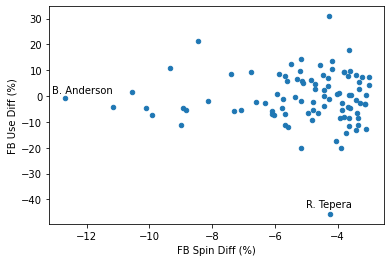

In [8]:
bigdrop.plot.scatter(x="FB Spin Diff (%)", y="FB Use Diff (%)")
plt.text(-5, -43, "R. Tepera")
plt.text(-13.1, 1, "B. Anderson")

## Curveballs

The curveball is a pitch intentionally thrown to provide a forward spin on the ball in order to cause the baseball to dive towards the plate from the original release point. We are going to analyze pitchers whose spin rate changed the most from 2020 to 2021 and also take a look at the change that spin rate had on the break or 'dive' that the pitch took for each pticher.

In [17]:
# Read in data from both years and merge the tables
curve_2020 = pd.read_csv('curves 2020.csv')
curve_2021 = pd.read_csv('curves 2021.csv')
curve_2020 = curve_2020.drop(curve_2020.columns[-1],axis=1)
curve_2021 = curve_2021.drop(curve_2021.columns[-1],axis=1)
curves = curve_2020.merge(curve_2021,on = 'player_id',how = 'inner',suffixes = (' 2020',' 2021'))

# Cleaning up Curves Dataframe and yearl curveball data
alist = ['year 2020','last_name 2021',' first_name 2021','year 2021']
curves = curves.drop(alist,axis = 1)
curves['Name'] = curves[' first_name 2020'] + ' ' + curves['last_name 2020'] 
curves = curves.drop([' first_name 2020','last_name 2020', "player_id"],axis = 1)
curves.set_index("Name", inplace=True)
curves.rename(columns={"cu_avg_spin 2020":"CB Avg Spin 2020", "cu_avg_break_x 2020":"CB Avg X Break 2020","cu_avg_break_z 2020":"CB Avg Z Break 2020"}, inplace=True)
curves.rename(columns={"cu_avg_spin 2021":"CB Avg Spin 2021", "cu_avg_break_x 2021":"CB Avg X Break 2021","cu_avg_break_z 2021":"CB Avg Z Break 2021"}, inplace=True)
curves = curves.dropna(subset=['CB Avg Spin 2020','CB Avg Spin 2021'])
curves_2020 = curves[['CB Avg Spin 2020','CB Avg X Break 2020','CB Avg Z Break 2020']]
curves_2021 = curves[['CB Avg Spin 2021','CB Avg X Break 2021','CB Avg Z Break 2021']]
curves.head()

,CB Avg Spin 2020,CB Avg X Break 2020,CB Avg Z Break 2020,CB Avg Spin 2021,CB Avg X Break 2021,CB Avg Z Break 2021
Name,,,,,,
Adam Wainwright,2791.0,16.8,-65.5,2839.0,16.6,-66.3
Zack Greinke,2428.0,10.6,-66.6,2365.0,11.4,-65.0
Rich Hill,2848.0,-19.1,-65.2,2714.0,-19.5,-66.7
Charlie Morton,2887.0,17.9,-54.1,3053.0,16.6,-52.5
Jon Lester,2569.0,-10.6,-55.6,2437.0,-10.3,-57.8


In [18]:
#Standarizing each variable for each year of curveball data
curves_2020_std = (
    (curves_2020 - curves_2020.mean()) / 
    curves_2020.std()
)
curves_2021_std = (
    (curves_2021 - curves_2021.mean()) / 
    curves_2021.std()
)

In [23]:
#Iterating through both yearly curveball data and calculating its euclidian distance to see whose shifted the most
temp_df = pd.DataFrame()
for i in curves_2020_std.itertuples(index = True):
    for j in curves_2021_std.itertuples(index = True):
        a = np.array(i[1:])
        b = np.array(j[1:])
        if i[0] == j[0]:
            z = np.sqrt(((a - b) ** 2).sum())
            x = i[0]
            y ={'Name':x,'Distance':z}
            temp_df = temp_df.append(y,ignore_index = True)
temp_df.set_index('Name',inplace = True,drop = True)
curves['Distance'] = temp_df['Distance']
curves_max = curves.nlargest(10,'CB Avg Spin 2020')



Text(0.5, 0.92, 'Spin Rate of Curveballs')

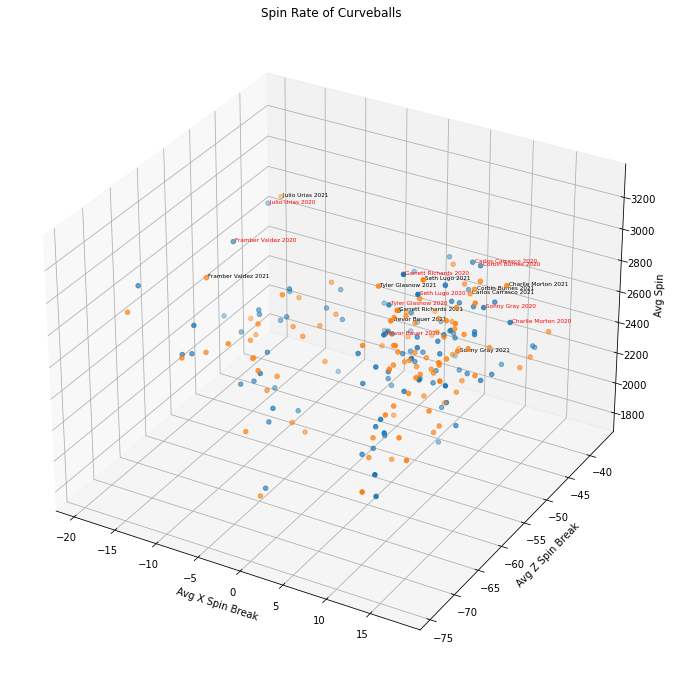

In [24]:
#3D Scatter plot of pitchers from 2020 and 2021 and their avg spin, horiz break, and vert break on curveballs
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (12,9))
ax = Axes3D(fig)
x = curves['CB Avg X Break 2020']
y = curves['CB Avg Z Break 2020']
z = curves['CB Avg Spin 2020']
a=curves['CB Avg X Break 2021']
b=curves['CB Avg Z Break 2021']
c=curves['CB Avg Spin 2021']
ax.scatter(x,y,z)
ax.scatter(a,b,c)
ax.set_xlabel('Avg X Spin Break')
ax.set_ylabel('Avg Z Spin Break')
ax.set_zlabel('Avg Spin')
for i in curves_max.itertuples():
    a = np.array(i[1:])
    x_2020 = a[1]
    y_2020 = a[2]
    z_2020 = a[0]
    name_2020 = i[0]
    x_2021 = a[4]
    y_2021 = a[5]
    z_2021 = a[3]
    name_2021 = i[0]
    ax.text(x_2020,y_2020,z_2020,s = name_2020+ ' 2020',color = 'red',fontsize = 'xx-small')
    ax.text(x_2021,y_2021,z_2021,s = name_2021+ ' 2021',color = 'black',fontsize = 'xx-small')
plt.title('Spin Rate of Curveballs')

NameError: name 'curves_max_std' is not defined

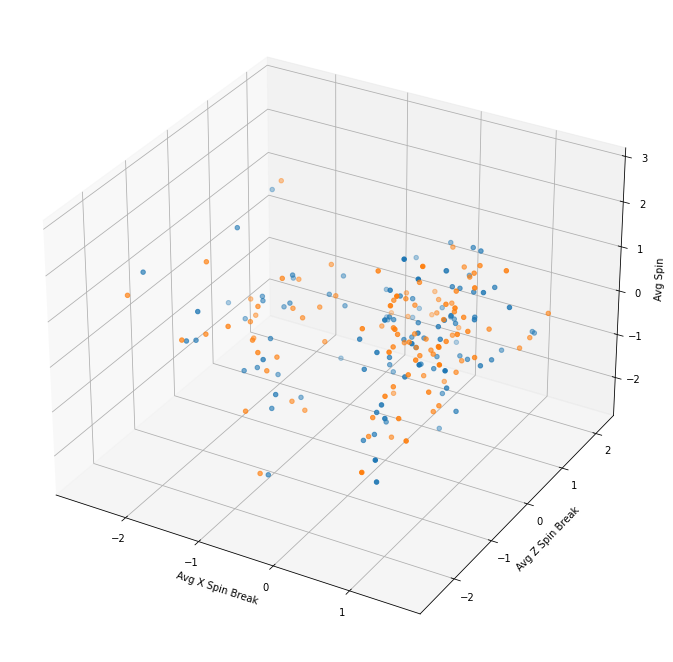

In [25]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (12,9))
ax = Axes3D(fig)
x = curves_2020_std['CB Avg X Break 2020']
y = curves_2020_std['CB Avg Z Break 2020']
z = curves_2020_std['CB Avg Spin 2020']
a=curves_2021_std['CB Avg X Break 2021']
b=curves_2021_std['CB Avg Z Break 2021']
c=curves_2021_std['CB Avg Spin 2021']
ax.scatter(x,y,z)
ax.scatter(a,b,c)
ax.set_xlabel('Avg X Spin Break')
ax.set_ylabel('Avg Z Spin Break')
ax.set_zlabel('Avg Spin')
for i in curves_max_std.itertuples():
    a = np.array(i[1:])
    x_2020 = a[1]
    y_2020 = a[2]
    z_2020 = a[0]
    name_2020 = i[0]
    b = np.array(i[4:])
    x_2021 = a[4]
    y_2021 = a[5]
    z_2021 = a[3]
    name_2021 = i[0]
    ax.text(x_2020,y_2020,z_2020,s = name_2020+ ' 2020',color = 'red',fontsize = 'xx-small')
    ax.text(x_2021,y_2021,z_2021,s = name_2021+ ' 2021',color = 'black',fontsize = 'xx-small')
plt.title('Spin Rate of Curveballs')

## Spin to Win

Let's now take a look at three metrics: [expected batting average](https://www.mlb.com/glossary/statcast/expected-batting-average "MLB Glossary (xBA)") (xBA), [earned run average](https://www.mlb.com/glossary/standard-stats/earned-run-average "MLB Glossary (ERA)") (ERA), and spin rate. For 2020:

In [ ]:
# Read in and clean up dataset
spin_to_win2020 = pd.read_csv("era_and_spin2020.csv")
spin_to_win2020['Name'] = spin_to_win2020[' first_name'] + ' ' + spin_to_win2020['last_name']
spin_to_win2020.drop(["player_id", "Unnamed: 8", "last_name", " first_name", "year"], axis=1, inplace=True)
position = spin_to_win2020.pop("Name")
spin_to_win2020.insert(0,'Name',position)
spin_to_win2020.rename(columns={"p_era": "ERA", "fastball_avg_spin": "FB Avg Spin", "breaking_avg_spin": "Breaking Avg Spin", "xba": "xBA"}, inplace=True)

# Combine fastball and breaking average spin into one variable
spin_to_win2020["Avg Spin"] = spin_to_win2020[["FB Avg Spin", "Breaking Avg Spin"]].mean(axis=1)
spin_to_win2020.drop(["FB Avg Spin", "Breaking Avg Spin"], axis=1, inplace=True)

# Sort by highest average spin
spin_to_win2020.sort_values("Avg Spin", inplace=True, ascending=False)

spin_to_win2020.head()

And for 2021:

In [ ]:
# Read in and clean up dataset
spin_to_win2021 = pd.read_csv("era_and_spin2021.csv")
spin_to_win2021['Name'] = spin_to_win2021[' first_name'] + ' ' + spin_to_win2021['last_name']
spin_to_win2021.drop(["player_id", "Unnamed: 8", "last_name", " first_name", "year"], axis=1, inplace=True)
position = spin_to_win2021.pop("Name")
spin_to_win2021.insert(0,'Name',position)
spin_to_win2021.rename(columns={"p_era": "ERA", "fastball_avg_spin": "FB Avg Spin", "breaking_avg_spin": "Breaking Avg Spin", "xba": "xBA"}, inplace=True)

# Combine fastball and breaking average spin into one variable
spin_to_win2021["Avg Spin"] = spin_to_win2021[["FB Avg Spin", "Breaking Avg Spin"]].mean(axis=1)
spin_to_win2021.drop(["FB Avg Spin", "Breaking Avg Spin"], axis=1, inplace=True)

# Sort by highest average spin
spin_to_win2021.sort_values("Avg Spin", inplace=True, ascending=False)

spin_to_win2021.head()

How much does spin rate affect ERA? Or basically, does pitching with more spin aid a pitcher in giving up less runs? We will graph out average spin vs ERA, just for the year 2021.

In [ ]:
from scipy import stats
spin_to_win2021.plot.scatter(x='Avg Spin', y='ERA',title='Average Spin vs. ERA')

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(spin_to_win2021['Avg Spin'],
                                                                   spin_to_win2021['ERA'])
pts = np.linspace(spin_to_win2021['Avg Spin'].min(), spin_to_win2021['Avg Spin'].max(), 500)
line = slope * pts + intercept
plt.plot(pts, line, lw=1, color='red')

Interestingly, there is not much of a correlation here. Let's see if xBA is different.

In [ ]:
spin_to_win2021.plot.scatter(x='Avg Spin', y='xBA',title='Average Spin vs. xBA')

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(spin_to_win2021['Avg Spin'],
                                                                   spin_to_win2021['xBA'])
pts = np.linspace(spin_to_win2021['Avg Spin'].min(), spin_to_win2021['Avg Spin'].max(), 500)
line = slope * pts + intercept
plt.plot(pts, line, lw=1, color='red')


This makes sense. Expected batting average measures the probability that when a batter hits the ball into fair territory off a pitcher, they register a hit (i.e. the batter reaches base safely). 

A ball that has a lot of spin on it is not *necessarily* harder to hit than other pitches; however, when the batter does make contact, it is more likely that they will pop the ball up or, especially, hit a ground ball (often times an easy out).

## Whodunnit?

In order to predict who used sticky stuff before MLB's crackdown, we will find the pitchers who had the biggest rise in ERA and xBA from 2020 to 2021. From there, we can see who had the biggest drop in spin rate -- and those will be our prime suspects.

We will make a new measurement and call it "change." At first, we were planning on just taking the average of the percent change in ERA and the percent change in xBA. However, we now see that xBA is much more affected by spin rate than ERA is, so we will weight it accordingly.

In [ ]:
# Merge the two tables
stwboth = spin_to_win2020.merge(spin_to_win2021, on="Name", how="inner", suffixes=(' 2020',' 2021'))

# Create new percent change columns and sort by our new "change" metric
stwboth["ERA Diff (%)"] = ((stwboth["ERA 2021"] - stwboth["ERA 2020"]) / (stwboth["ERA 2020"])) * 100
stwboth["xBA Diff (%)"] = ((stwboth["xBA 2021"] - stwboth["xBA 2020"]) / (stwboth["xBA 2020"])) * 100
stwboth["Change (%)"] = (2 * (stwboth["xBA Diff (%)"]) + stwboth["ERA Diff (%)"]) / 2    # weighting xBA Diff double
stwboth.sort_values("Change (%)", ascending=False, inplace=True)

# Set index as name for simplicity
stwboth.set_index("Name", inplace=True)

stwboth.head()

In [ ]:
# Get 20 biggest drops
drop_top_20 = stwboth.head(20)

# Biggest drop in spin rate
drop_top_20["Spin Rate Drop (%)"] = -((drop_top_20["Avg Spin 2021"] - drop_top_20["Avg Spin 2020"]) / (drop_top_20["Avg Spin 2020"])) * 100
drop_top_20.sort_values("Spin Rate Drop (%)", ascending=False, inplace=True)

drop_top_20.head()

Finally, we have our answer! We predict that [Devin Williams](https://baseballsavant.mlb.com/savant-player/devin-williams-642207?stats=statcast-r-pitching-mlb "Devin Williams") on the Brewers, [Bryan Garcia](https://baseballsavant.mlb.com/savant-player/bryan-garcia-650530?stats=statcast-r-pitching-mlb "Bryan Garcia") on the Tigers, [Kyle Cody](https://baseballsavant.mlb.com/savant-player/kyle-cody-621129?stats=statcast-r-pitching-mlb "Kyle Cody") on the Twins, [Tanner Scott](https://baseballsavant.mlb.com/savant-player/tanner-scott-656945?stats=statcast-r-pitching-mlb "Tanner Scott") on the Orioles, and [Shawn Armstrong]("https://baseballsavant.mlb.com/savant-player/shawn-armstrong-542888 "Shawn Armstrong") on the Indians were using foreign substances prior to the enforcement of the rules.

In the graph below, we plot difference in ERA against difference in xBA. The size of the dot is determined by that pitcher's drop in spin rate. We labeled our top three culprits.

In [ ]:
s = drop_top_20["Spin Rate Drop (%)"] ** 3
drop_top_20.plot.scatter("ERA Diff (%)", "xBA Diff (%)", s=s, title = "Difference in ERA vs. Difference in xBA")
plt.text(620, 66, "D. Williams")
plt.text(310, 4, "B. Garcia")
plt.text(370, 53, "K. Cody")

**Disclaimer:** This is, of course, just our prediction using our analysis and measurements. Did these pitchers necessarily cheat before rule enforcement? No. Pitchers (and all other athletes) have off years. However, judging by their performance before and after MLB's crackdown, this is at least a possibility.

## Conclusion

Overall, we were able to use the various metrics that our dataset offered us to determine who *we* think used sticky stuff prior to the MLB's rule enforcement. We also had a blast doing it. Let's take a look at our original questions:

* Which pitchers’ average spin rate dropped the most after the enforcement of the rule? 
   
    * We were able to answer this both based on pitch and eventually based on all pitches!

* Which pitchers’ expected batting average got higher after the change?
    
    * Not only did we look at this, but also ERA. However, xBA was clearly more affected by a drop in spin rate.


* Did some pitchers stop throwing a favorite pitch of theirs because they were better at it before the change?
    
    * We answered this -- not really. There were a couple pitchers who stopped throwing their fastball and had a big drop in usage percentage, but it didn't seem to really be related.

* *Our main question:* Who was using the sticky stuff?

    * Through our analysis, we came up with our prime suspects. It was very enjoyable to speculate using a plethora of statistics, and we look forward to seeing more information on this subject come out in the coming years!